## Visualization using PCA and t-SNE

**Apply PCA on each of the two attached color images as a tool for visualization. As the feature vector for each pixel use a 5-dimensional feature vector consisting of normalized vertical and horizontal coordinates of the pixel relative to the top-left corner of the image, as well as normalized red, green, and blue values of the image color at that pixel. Normalize each feature by linearly shifting and scaling the values to the interval [0,1], such that the set of 5-dimensional normalized feature vectors representing each pixel are in the unit-hypercube [0,1]5.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import seaborn as sns

from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

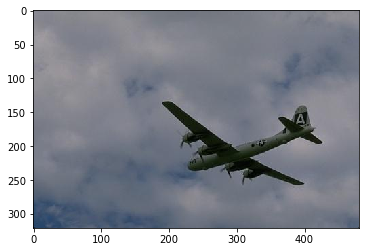

In [2]:
imgPlane = cv2.cvtColor(cv2.imread('./data/3096_colorPlane.jpg'), cv2.COLOR_BGR2RGB)
xPlane,yPlane,zPlane = imgPlane.shape
plt.imshow(imgPlane)
plt.show()

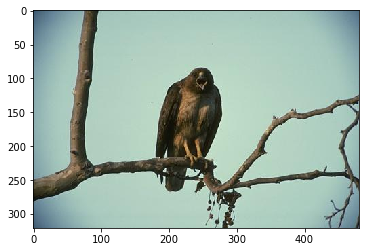

In [3]:
imgBird = cv2.cvtColor(cv2.imread('./data/42049_colorBird.jpg'), cv2.COLOR_BGR2RGB)
xBird,yBird,zBird = imgBird.shape
plt.imshow(imgBird)
plt.show()

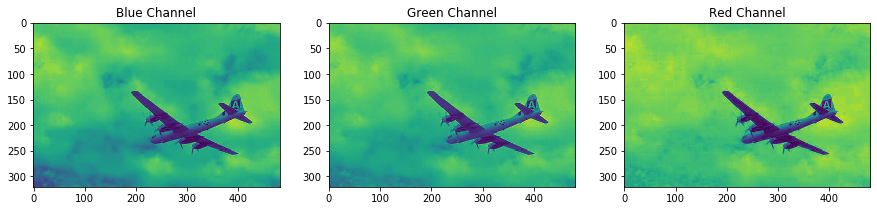

In [4]:
bPlane, gPlane, rPlane = cv2.split(imgPlane)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(bPlane)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(gPlane)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(rPlane)
plt.show()

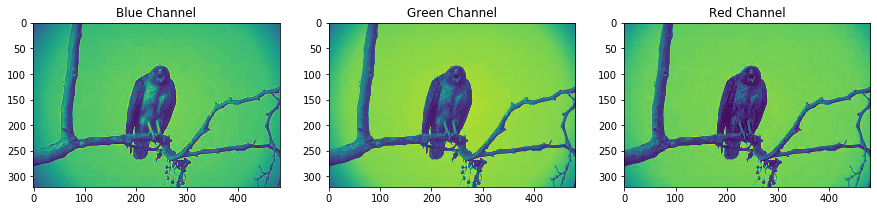

In [5]:
bBird, gBird, rBird = cv2.split(imgBird)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(bBird)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(gBird)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(rBird)
plt.show()

In [6]:
#normalize plane channels
bPlane_norm = bPlane/255
gPlane_norm = gPlane/255
rPlane_norm = rPlane/255

bPlane_norm = bPlane_norm.reshape([-1,1])
gPlane_norm = gPlane_norm.reshape([-1,1])
rPlane_norm = rPlane_norm.reshape([-1,1])

hPlane = np.zeros((xPlane,yPlane))
for i in range(xPlane):
    for j in range(yPlane):
        hPlane[i,j] = i/xPlane

vPlane = np.zeros((xPlane,yPlane))
for i in range(xPlane):
    for j in range(yPlane):
        vPlane[i,j] = j/yPlane
        
hPlane = hPlane.reshape([-1,1])
vPlane = vPlane.reshape([-1,1])

arrPlane_5D = np.hstack((vPlane, hPlane, rPlane_norm, gPlane_norm, bPlane_norm))

In [7]:
#normalize bird channels
bBird_norm = bBird/255
gBird_norm = gBird/255
rBird_norm = rBird/255

bBird_norm = bBird_norm.reshape([-1,1])
gBird_norm = gBird_norm.reshape([-1,1])
rBird_norm = rBird_norm.reshape([-1,1])

hBird = np.zeros((xBird,yBird))
for i in range(xBird):
    for j in range(yBird):
        hBird[i,j] = i/xBird

vBird = np.zeros((xBird,yBird))
for i in range(xBird):
    for j in range(yBird):
        vBird[i,j] = j/yBird
        
hBird = hBird.reshape([-1,1])
vBird = vBird.reshape([-1,1])

arrBird_5D = np.hstack((vBird, hBird, rBird_norm, gBird_norm, bBird_norm))

**Present a scree plot or a Pareto plot, showing the scatter power represented by D=1,2,3,4 and 5 principal components.** 

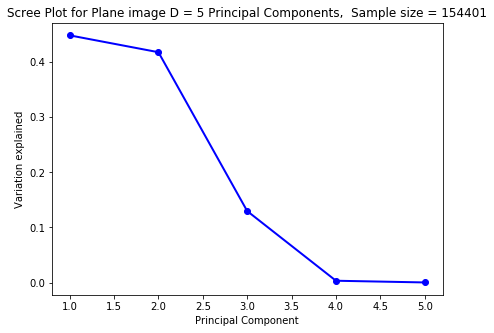

PCA Plane :  0.9999999999999999
Runtime of PCA : 0.17752575874328613


In [8]:
#PCA on Plane and Scree Plot
start = time.time()

n_components = 5
fig = plt.figure(figsize = (7,5)) 
plt.title("Scree Plot for Plane image D = 5 Principal Components,  Sample size = {}".format(arrPlane_5D.shape[0]))
plt.ylabel('Variation explained')
plt.xlabel('Principal Component')
pcaPlane = PCA(n_components)
pcaPlane = pcaPlane.fit(arrPlane_5D)
PC_values = np.arange(pcaPlane.n_components_) + 1
plt.plot(PC_values,pcaPlane.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
resultsPlane = pcaPlane.fit_transform(arrPlane_5D)
plt.show()

print("PCA Plane : ", sum(pcaPlane.explained_variance_ratio_))
print(f"Runtime of PCA : {time.time() - start}")

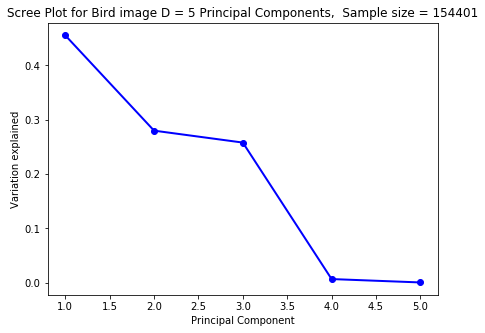

PCA Bird :  1.0
Runtime of PCA : 0.15957403182983398


In [9]:
#PCA on Bird and Scree Plot
start = time.time()

n_components = 5
fig = plt.figure(figsize = (7,5)) 
plt.title("Scree Plot for Bird image D = 5 Principal Components,  Sample size = {}".format(arrBird_5D.shape[0]))
plt.ylabel('Variation explained')
plt.xlabel('Principal Component')
pcaBird = PCA(n_components)
pcaBird = pcaBird.fit(arrBird_5D)
PC_values = np.arange(pcaBird.n_components_) + 1
plt.plot(PC_values,pcaBird.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
resultsBird = pcaBird.fit_transform(arrBird_5D)
plt.show()

print("PCA Bird : ", sum(pcaBird.explained_variance_ratio_))
print(f"Runtime of PCA : {time.time() - start}")

**What is the smallest, reasonable value of D to present a good representation of the data?** 

**From the above scree plots, it can be observed that D = 4 gives the smallest, reasonable value of D 
to present a good representation of the data.**
***

**Plot the PCA-based representations of the feature vectors in that dimensional subspace (if less than or equal to 3 dimensions) or in 3-dimensions otherwise. Try to choose a visualization to present the shape of the high density regions.**

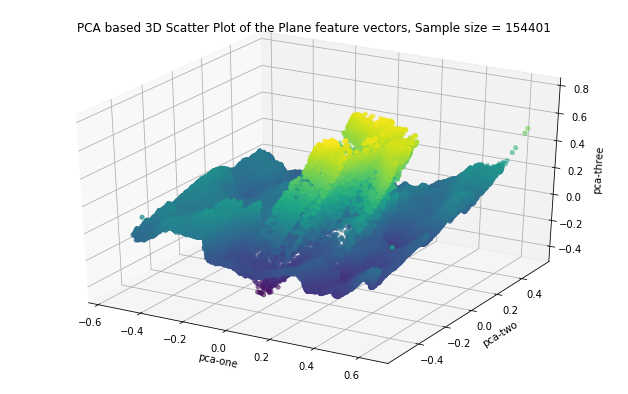

Runtime of PCA-based representations of the Plane feature vectors : 3.6583709716796875


In [10]:
#PCA-based 3D representations of the Plane feature vectors
start = time.time()

pca_one = resultsPlane[:,0]
pca_two = resultsPlane[:,1]
pca_three = resultsPlane[:,2]

fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
ax.scatter3D(pca_one, pca_two, pca_three, c = pca_three, cmap='viridis', linewidth=0.5)
plt.title("PCA based 3D Scatter Plot of the Plane feature vectors, Sample size = {}".format(resultsPlane.shape[0]))
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

print(f"Runtime of PCA-based representations of the Plane feature vectors : {time.time() - start}")

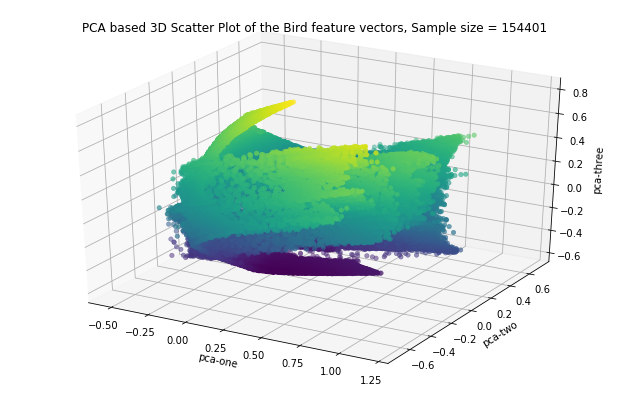

Runtime of PCA-based representations of the Bird feature vectors : 3.655472755432129


In [11]:
#PCA-based 3D representations of the Bird feature vectors
start = time.time()

pca_one = resultsBird[:,0]
pca_two = resultsBird[:,1]
pca_three = resultsBird[:,2]

fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
ax.scatter3D(pca_one, pca_two, pca_three, c = pca_three, cmap='viridis', linewidth=0.5)
plt.title("PCA based 3D Scatter Plot of the Bird feature vectors, Sample size = {}".format(resultsBird.shape[0]))
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

print(f"Runtime of PCA-based representations of the Bird feature vectors : {time.time() - start}")

**Apply t-SNE on each of the two attached color images as a tool for visualization in 2 dimensions. Use the same normalized features vector as with PCA. Use a perplexity value of 30, and specify 2 other values of perplexity which you feel are suited for each file.**

**Plot the t-SNE-based representations of the feature vectors for the three perplexity values you have chosen.**

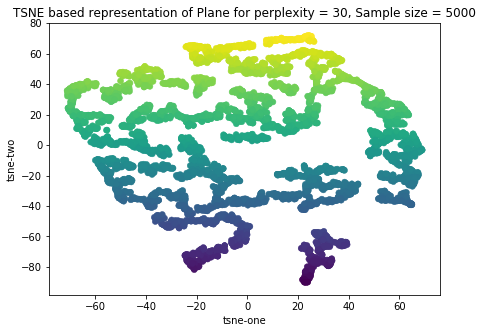

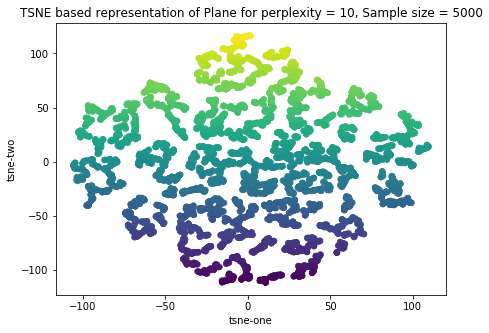

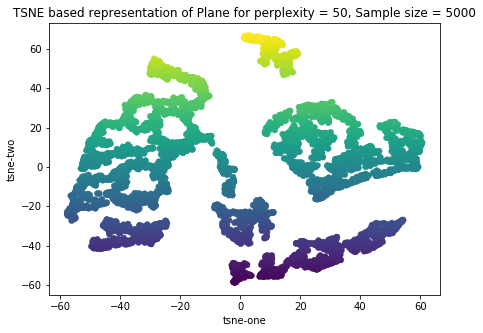

Runtime of tsne-based representations of the feature vectors : 68.99593663215637


In [12]:
#t-SNE on Plane Image and plotting t-SNE based representation
def plotTsne(fc_vec, p):
    fig = plt.figure(figsize = (7,5)) 
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_results = tsne.fit_transform(fc_vec)
    tsne_one = tsne_results[:,0]
    tsne_two = tsne_results[:,1]
    plt.scatter(tsne_one, tsne_two, c = tsne_two, cmap='viridis', linewidth=0.5)
    plt.title("TSNE based representation of Plane for perplexity = {}, Sample size = {}".format(p,fc_vec.shape[0]))
    plt.xlabel('tsne-one')
    plt.ylabel('tsne-two')
    plt.show()
    
    
randomRows = np.random.randint(resultsPlane.shape[0], size=5000)
samplePlane_arr5D = np.empty((0,5), int)
for i in randomRows:
    b = np.array([arrPlane_5D[i, :]])
    samplePlane_arr5D = np.append(samplePlane_arr5D, b, axis=0)
start = time.time()

plotTsne(samplePlane_arr5D, 30)
plotTsne(samplePlane_arr5D, 10)
plotTsne(samplePlane_arr5D, 50)

print(f"Runtime of tsne-based representations of the feature vectors : {time.time() - start}")

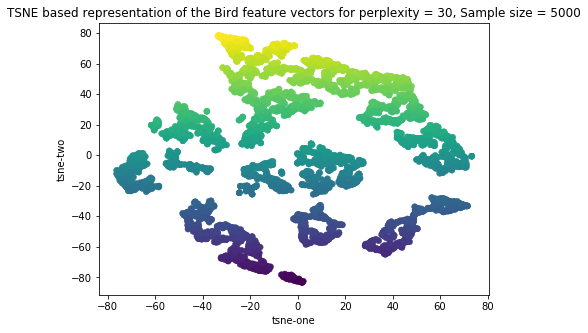

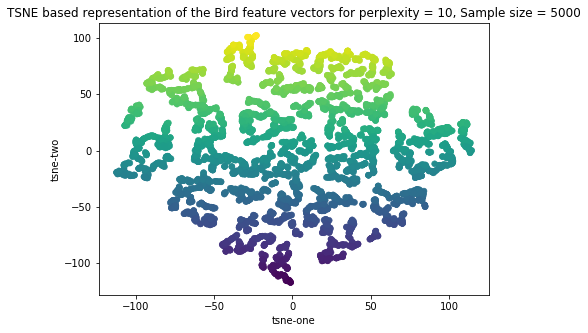

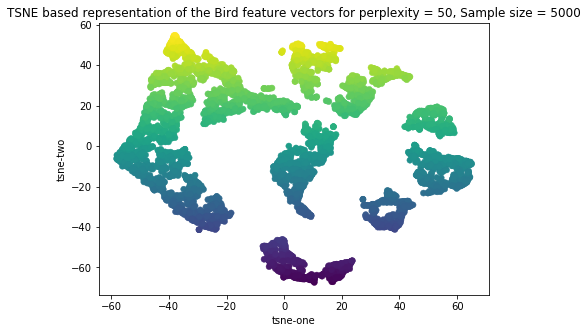

Runtime of tsne-based representations of the feature vectors : 65.02063417434692


In [13]:
#t-SNE on Bird Image and plotting t-SNE based representation
def plotTsne(fc_vec, p):
    fig = plt.figure(figsize = (7,5)) 
    tsne = TSNE(n_components=2, perplexity=p)
    tsne_results = tsne.fit_transform(fc_vec)
    tsne_one = tsne_results[:,0]
    tsne_two = tsne_results[:,1]
    plt.scatter(tsne_one, tsne_two, c = tsne_two, cmap='viridis', linewidth=0.5)
    plt.title("TSNE based representation of the Bird feature vectors for " +
              "perplexity = {}, Sample size = {}".format(p,fc_vec.shape[0]))
    plt.xlabel('tsne-one')
    plt.ylabel('tsne-two')
    plt.show()
    
    
randomRows = np.random.randint(resultsBird.shape[0], size=5000)
sampleBird_arr5D = np.empty((0,5), int)
for i in randomRows:
    b = np.array([arrBird_5D[i, :]])
    sampleBird_arr5D = np.append(sampleBird_arr5D, b, axis=0)
start = time.time()

plotTsne(sampleBird_arr5D, 30)
plotTsne(sampleBird_arr5D, 10)
plotTsne(sampleBird_arr5D, 50)

print(f"Runtime of tsne-based representations of the feature vectors : {time.time() - start}")

**Comment on the influence of perplexity on the visualizations.**

**As the perplexity value increases it tends to create clearer clustering than lower perplexities. As we increase the perplexity, clusters tend to shrink into denser structures thus, the clustering of the scatter is very loose for low perplexity and a lot tighter for higher perplexity.**
***

## K-means, GMM and Hierarchical Clustering

**Using the K-Means clustering algorithm with minimum Euclidean-distance-based assignments of samples to cluster centroids, segment the two attached color images into K ∈ {2,3,4,5} segments. As the feature vector for each pixel use a 5-dimensional feature vector consisting of normalized vertical and horizontal coordinates of the pixel relative to the top-left corner of the image, as well as normalized red, green, and blue values of the image color at that pixel. Normalize each feature by linearly shifting and scaling the values to the interval [0,1], such that the set of 5-dimensional normalized feature vectors representing each pixel are in the unit-hypercube [0,1]5.**

**For each K ∈ {2, 3, 4, 5}, let the algorithm assign labels to each pixel; specifically, label lrc ∈ {1,…,K} to the pixel located at row r and column c. Present your clustering results in the form of an image of these label values. Make sure you improve this segmentation outcome visualization by using a contrast enhancement method; for instance, assign a unique color value to each label and make your label image colored, or assign visually distinct grayscale value levels to each label value to make best use of the range of gray values at your disposal for visualization.**

**For each value of K, compute the Silhouette Coefficient and the CH Index to determine the quality of the clustering solution.**

In [14]:
#Normalizing
imgnPlane = cv2.normalize(imgPlane, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imgnBird = cv2.normalize(imgBird, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixelPlane = imgPlane.reshape((-1, 3))
pixelBird = imgBird.reshape((-1, 3))

# convert to float
pixelPlane = np.float32(pixelPlane)
pixelBird = np.float32(pixelBird)

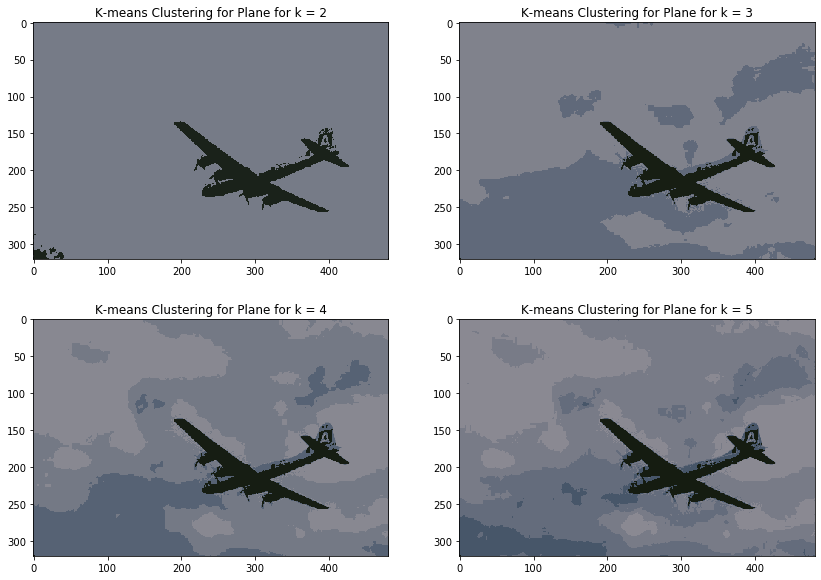

For k = 2, the average Silhouette Coefficient : 0.8119586706161499, CH Index : 9913.563137095989
For k = 3, the average Silhouette Coefficient : 0.5736082196235657, CH Index : 14631.651312904427
For k = 4, the average Silhouette Coefficient : 0.5385192632675171, CH Index : 18374.82004731954
For k = 5, the average Silhouette Coefficient : 0.5248717665672302, CH Index : 20819.454797688104
Runtime of K-means on Plane: 8.552780389785767


In [15]:
#kmeans on Plane
k = [2, 3, 4,5]
a = 2
b = 2
c = 1
scPlane = []
chPlane = []

start = time.time()
fig = plt.figure(figsize=(14,10))
for num in k:
    km = KMeans(n_clusters=num).fit(pixelPlane)
    centers = km.cluster_centers_
    centers = np.array(centers,dtype='uint8')
    
    colors = []
    for each_col in centers:
        colors.append(each_col)
    
    segmentedImage = np.zeros((imgPlane.shape[0] * imgPlane.shape[1],3),dtype='uint8')
    for i in range(segmentedImage.shape[0]):
        segmentedImage[i] = colors[km.labels_[i]]

    segmentedImage = segmentedImage.reshape((imgPlane.shape))
    plt.subplot(a, b, c)
    plt.imshow(segmentedImage)
    plt.title('K-means Clustering for Plane for k = {}'.format(num))
    c += 1
    
    df = pd.DataFrame(pixelPlane).sample(n=5000, random_state=1)
    km2 = KMeans(n_clusters=num).fit(df)
    labels = km2.labels_
    scPlane.append(silhouette_score(df, labels, metric =   'euclidean'))
    chPlane.append(calinski_harabasz_score(df, labels))
    
    
plt.show()
for i in range(4):
    print("For k = {}, the average Silhouette Coefficient : {}, CH Index : {}".format(i+2,scPlane[i],chPlane[i]))
    
print(f"Runtime of K-means on Plane: {time.time() - start}")

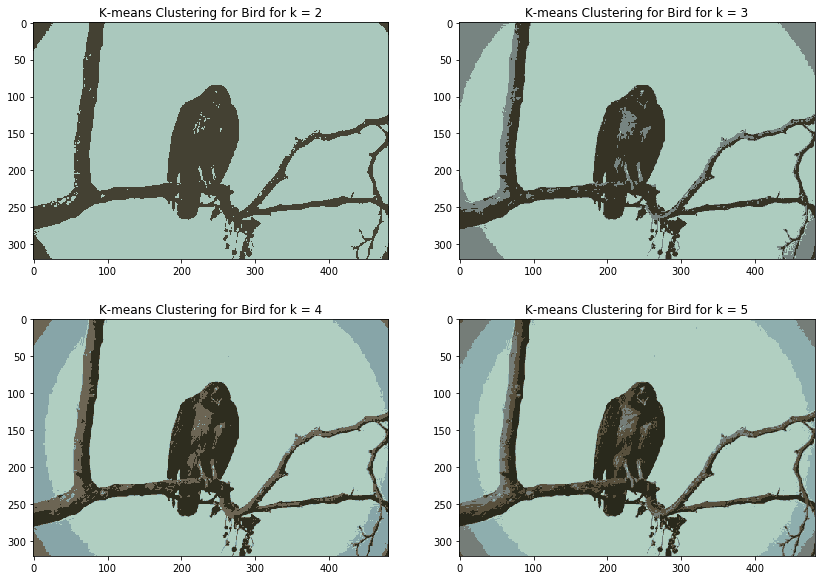

For k = 2, the average Silhouette Coefficient : 0.8246602416038513, CH Index : 29806.04446415688
For k = 3, the average Silhouette Coefficient : 0.7574741244316101, CH Index : 30364.30984545472
For k = 4, the average Silhouette Coefficient : 0.6916184425354004, CH Index : 35392.962792212034
For k = 5, the average Silhouette Coefficient : 0.6616911292076111, CH Index : 34893.69383060685
Runtime of K-means on Bird: 8.668081045150757


In [16]:
#kmeans on Bird
k = [2, 3, 4, 5]
a = 2
b = 2
c = 1
scBird = []
chBird = []

start = time.time()
fig = plt.figure(figsize=(14,10))
for num in k:
    km = KMeans(n_clusters=num).fit(pixelBird)
    centers = km.cluster_centers_
    centers = np.array(centers,dtype='uint8')
    
    colors = []
    for each_col in centers:
        colors.append(each_col)
    
    segmentedImage = np.zeros((imgBird.shape[0] * imgBird.shape[1],3),dtype='uint8')
    for i in range(segmentedImage.shape[0]):
        segmentedImage[i] = colors[km.labels_[i]]

    segmentedImage = segmentedImage.reshape((imgBird.shape))
    plt.subplot(a, b, c)
    plt.imshow(segmentedImage)
    plt.title('K-means Clustering for Bird for k = {}'.format(num))
    c += 1
    
    df = pd.DataFrame(pixelBird).sample(n=5000, random_state=1)
    km2 = KMeans(n_clusters=num).fit(df)
    labels = km2.labels_
    scBird.append(silhouette_score(df, labels, metric =   'euclidean'))
    chBird.append(calinski_harabasz_score(df, labels))
    
    
plt.show()
for i in range(4):
    print("For k = {}, the average Silhouette Coefficient : {}, CH Index : {}".format(i+2,scBird[i],chBird[i]))
    
print(f"Runtime of K-means on Bird: {time.time() - start}")

**Based on the visualizations and the clustering coefficients, determine the best value of K for K-means clustering.**

**The best value of K for K-means clustering is K = 2.**
***

**Return to the PCA and t-SNE plots to display your clustering solutions in those scatter plots.**

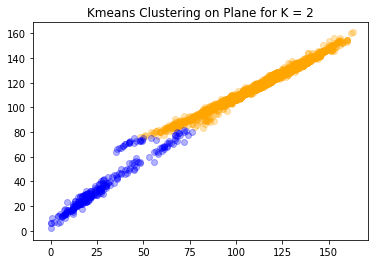

In [17]:
#PLotting clustering solutions for Plane
df = pd.DataFrame(pixelPlane).sample(n=5000, random_state=1)
km = KMeans(n_clusters= 2)
label = km.fit_predict(df)

filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
 
plt.scatter(list(filtered_label0[0]) , list(filtered_label0[1]), color='orange',alpha=.3)
plt.scatter(list(filtered_label1[0]) , list(filtered_label1[1]), color='blue', alpha=.3)
plt.title('Kmeans Clustering on Plane for K = 2')
plt.show()


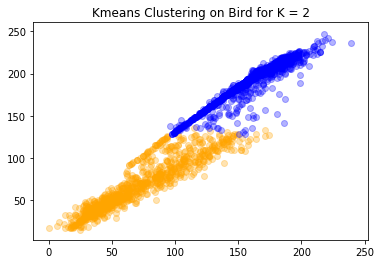

In [18]:
#Plotting clustering solutions for Bird
df = pd.DataFrame(pixelBird).sample(n=5000, random_state=1)
km = KMeans(n_clusters= 2)
label = km.fit_predict(df)

filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
 
plt.scatter(list(filtered_label0[0]) , list(filtered_label0[1]), color='orange',alpha=.3)
plt.scatter(list(filtered_label1[0]) , list(filtered_label1[1]), color='blue', alpha=.3)
plt.title('Kmeans Clustering on Bird for K = 2')
plt.show()

**Repeat this segmentation exercise using GMM-based clustering. For each specific K, use the EM algorithm to fit a GMM with K components, and then use that GMM to do MAP-classification style cluster label assignments to pixels. Display results similarly for this second clustering method, and present the silhouette coefficents and CH Indices. Determine the best value of K for GMM clustering.**

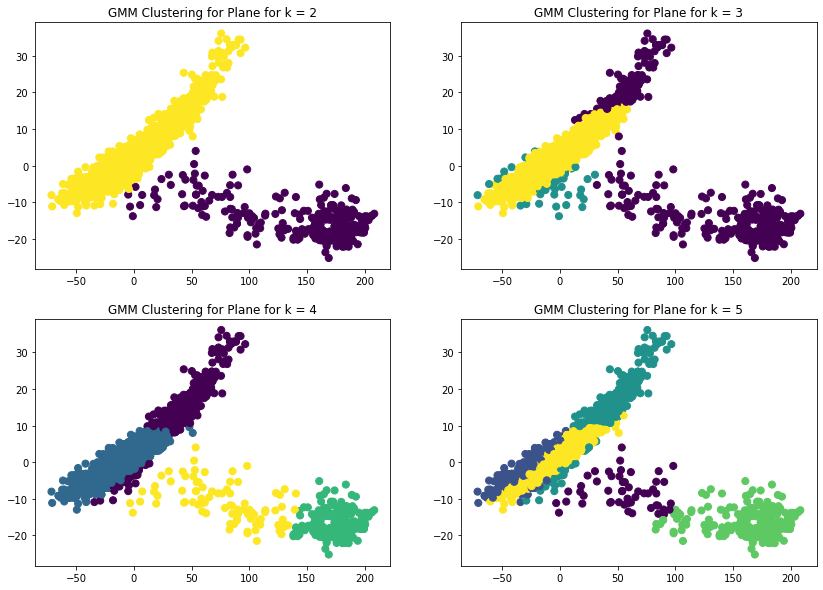

Runtime of GMM on Plane: 2.865586519241333
For k = 2, the average Silhouette Coefficient : 0.7923777103424072, CH Index : 8226.374189752638
For k = 3, the average Silhouette Coefficient : 0.16505646705627441, CH Index : 4152.87871233167
For k = 4, the average Silhouette Coefficient : 0.5489843487739563, CH Index : 6913.161684340693
For k = 5, the average Silhouette Coefficient : 0.14183399081230164, CH Index : 5706.334180509974


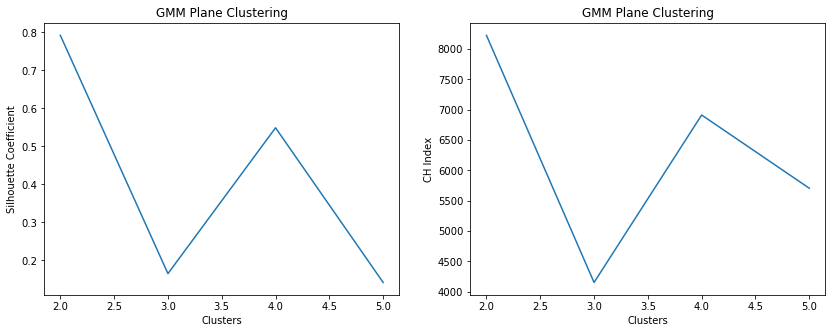

In [19]:
#GMM for Plane
k = [2, 3, 4,5]
scPlane = []
chPlane = []
a = 2
b = 2
c = 1

df = pd.DataFrame(pixelPlane).sample(n=5000, random_state=1)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df)

start = time.time()
fig = plt.figure(figsize=(14,10))
for num in k:
    gmm = GaussianMixture(n_components = num, init_params='random').fit(Y_sklearn)
    prediction_gmm = gmm.predict(Y_sklearn)
    probs = gmm.predict_proba(Y_sklearn)
    
    scPlane.append(silhouette_score(df, prediction_gmm, metric =   'euclidean'))
    chPlane.append(calinski_harabasz_score(df, prediction_gmm))

    plt.subplot(a, b, c)
    plt.title('GMM Clustering for Plane for k = {}'.format(num))
    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
    c += 1

plt.show()
print(f"Runtime of GMM on Plane: {time.time() - start}")

for i in range(4):
    print("For k = {}, the average Silhouette Coefficient : {}, CH Index : {}".format(i+2,scPlane[i],chPlane[i]))

fig = plt.figure(figsize = (14, 5)) 
fig.add_subplot(121)
plt.plot(np.arange(2,6), scPlane)
plt.title('GMM Plane Clustering')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')

fig.add_subplot(122)
plt.plot(np.arange(2,6), chPlane)
plt.title('GMM Plane Clustering')
plt.xlabel('Clusters')
plt.ylabel('CH Index')

plt.show()

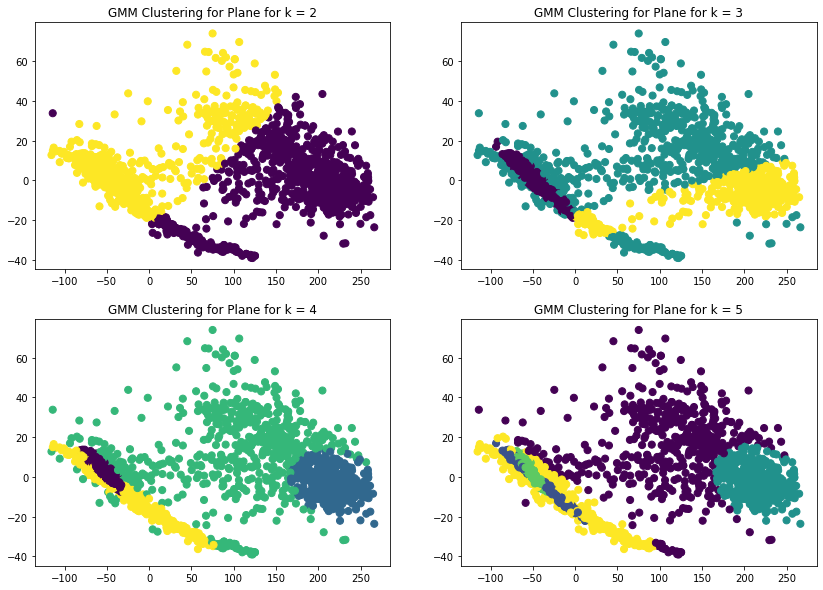

Runtime of GMM on Bird: 2.7846014499664307
For k = 2, the average Silhouette Coefficient : 0.7507746815681458, CH Index : 14581.613982785142
For k = 3, the average Silhouette Coefficient : 0.6134164929389954, CH Index : 5617.216998433505
For k = 4, the average Silhouette Coefficient : 0.5646315217018127, CH Index : 11904.6006900483
For k = 5, the average Silhouette Coefficient : 0.4241776466369629, CH Index : 11418.623464231026


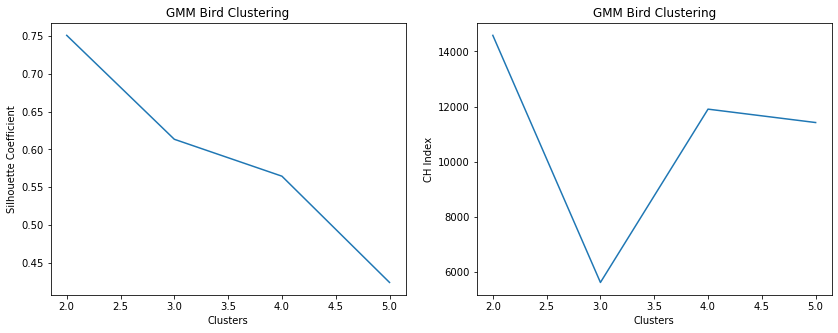

In [20]:
#GMM for Bird
k = [2, 3, 4,5]
scBird = []
chBird = []
a = 2
b = 2
c = 1

df = pd.DataFrame(pixelBird).sample(n=5000, random_state=1)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df)

start = time.time()
fig = plt.figure(figsize=(14,10))
for num in k:
    gmm = GaussianMixture(n_components = num, init_params='random').fit(Y_sklearn)
    prediction_gmm = gmm.predict(Y_sklearn)
    probs = gmm.predict_proba(Y_sklearn)
    
    scBird.append(silhouette_score(df, prediction_gmm, metric =   'euclidean'))
    chBird.append(calinski_harabasz_score(df, prediction_gmm))

    plt.subplot(a, b, c)
    plt.title('GMM Clustering for Plane for k = {}'.format(num))
    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
    c += 1

plt.show()
print(f"Runtime of GMM on Bird: {time.time() - start}")

for i in range(4):
    print("For k = {}, the average Silhouette Coefficient : {}, CH Index : {}".format(i+2,scBird[i],chBird[i]))

fig = plt.figure(figsize = (14, 5)) 
fig.add_subplot(121)
plt.plot(np.arange(2,6), scBird)
plt.title('GMM Bird Clustering')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')

fig.add_subplot(122)
plt.plot(np.arange(2,6), chBird)
plt.title('GMM Bird Clustering')
plt.xlabel('Clusters')
plt.ylabel('CH Index')

plt.show()

**Return to the PCA and t-SNE plots to display your clustering solutions in those scatter plots.**

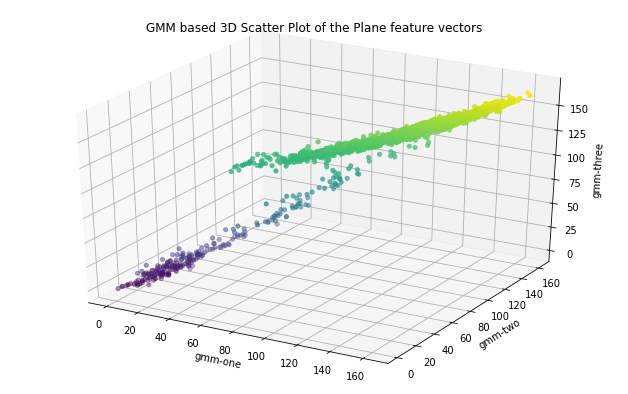

In [21]:
##Plotting clustering solutions for Plane
df = pd.DataFrame(pixelPlane).sample(n=5000, random_state=1)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df)
gmm = GaussianMixture(n_components = 2, init_params='random').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)

filtered_label0 = df[prediction_gmm == 0]
filtered_label1 = df[prediction_gmm == 1]
filtered_label2 = df[prediction_gmm == 2]
filtered_label = filtered_label0.append([filtered_label1, filtered_label2])

gmm_one = filtered_label.iloc[:,0]
gmm_two = filtered_label.iloc[:,1]
gmm_three = filtered_label.iloc[:,2]

fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
ax.scatter3D(gmm_one, gmm_two, gmm_three, c = gmm_three, cmap='viridis', linewidth=0.5)
plt.title("GMM based 3D Scatter Plot of the Plane feature vectors")
ax.set_xlabel('gmm-one')
ax.set_ylabel('gmm-two')
ax.set_zlabel('gmm-three')
plt.show()

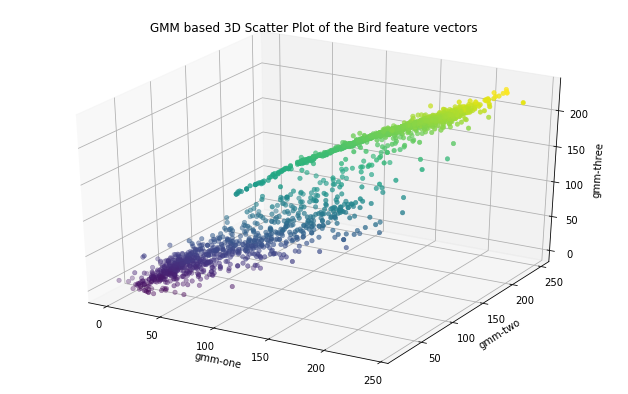

In [22]:
##Plotting clustering solutions for Bird
df = pd.DataFrame(pixelBird).sample(n=5000, random_state=1)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df)
gmm = GaussianMixture(n_components = 2, init_params='random').fit(Y_sklearn)
prediction_gmm = gmm.predict(Y_sklearn)

filtered_label0 = df[prediction_gmm == 0]
filtered_label1 = df[prediction_gmm == 1]
filtered_label2 = df[prediction_gmm == 2]
filtered_label = filtered_label0.append([filtered_label1, filtered_label2])

gmm_one = filtered_label.iloc[:,0]
gmm_two = filtered_label.iloc[:,1]
gmm_three = filtered_label.iloc[:,2]

fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
ax.scatter3D(gmm_one, gmm_two, gmm_three, c = gmm_three, cmap='viridis', linewidth=0.5)
plt.title("GMM based 3D Scatter Plot of the Bird feature vectors")
ax.set_xlabel('gmm-one')
ax.set_ylabel('gmm-two')
ax.set_zlabel('gmm-three')
plt.show()

**Repeat the segmentation exercise using hierarchical clustering, using a Euclidean metric for the distance matrix, and the “single” linkage method. Determine the clustering produced for C=2,3,4, and 5 clusters. Present the visualizations and clustering indices as before, and determine the best value of C.**

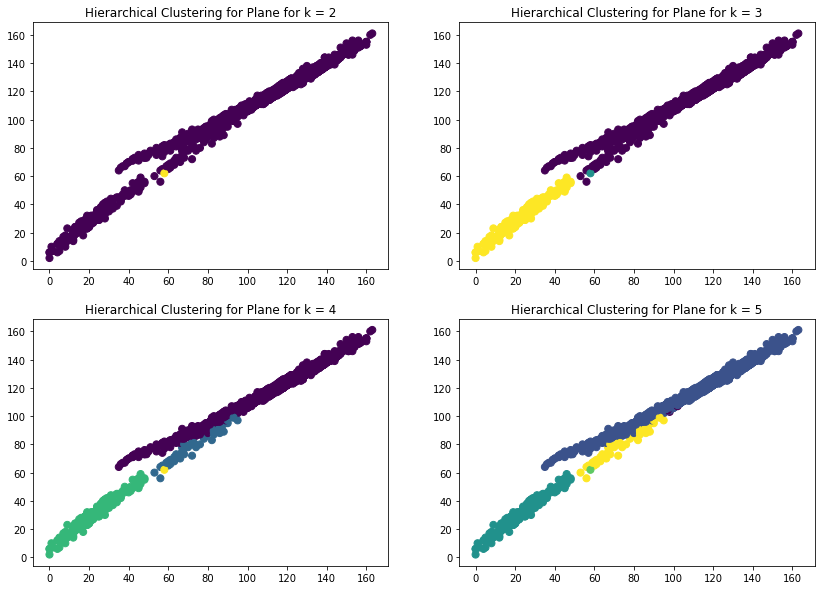

Runtime of Hierarchical clustering on Plane: 3.43686580657959
For k = 2, the average Silhouette Coefficient : 0.577125072479248, CH Index : 4.899196983954324
For k = 3, the average Silhouette Coefficient : 0.6818429827690125, CH Index : 4440.167308459891
For k = 4, the average Silhouette Coefficient : 0.6387597918510437, CH Index : 3635.716364040667
For k = 5, the average Silhouette Coefficient : 0.22391420602798462, CH Index : 2735.7606282320294


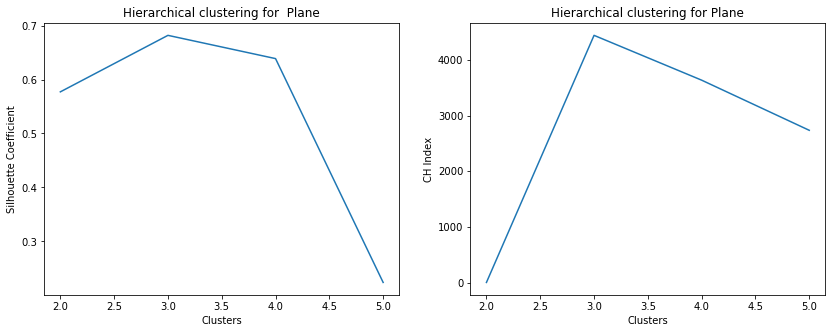

In [23]:
#Hierarchical clustering for Plane
k = [2, 3, 4,5]
scPlane = []
chPlane = []
a = 2
b = 2
c = 1

df = pd.DataFrame(pixelPlane).sample(n=5000, random_state=1)

start = time.time()
fig = plt.figure(figsize=(14,10))
for num in k:
    cluster = AgglomerativeClustering(n_clusters=num, affinity='euclidean', linkage='single')
    cluster.fit_predict(df)
    labels = cluster.labels_
    
    scPlane.append(silhouette_score(df, labels, metric = 'euclidean'))
    chPlane.append(calinski_harabasz_score(df, labels))

    plt.subplot(a, b, c)
    plt.title('Hierarchical Clustering for Plane for k = {}'.format(num))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1],c=labels ,s=50, cmap='viridis')
    c += 1

plt.show()
print(f"Runtime of Hierarchical clustering on Plane: {time.time() - start}")

for i in range(4):
    print("For k = {}, the average Silhouette Coefficient : {}, CH Index : {}".format(i+2,scPlane[i],chPlane[i]))

fig = plt.figure(figsize = (14, 5)) 
fig.add_subplot(121)
plt.plot(np.arange(2,6), scPlane)
plt.title('Hierarchical clustering for  Plane')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')

fig.add_subplot(122)
plt.plot(np.arange(2,6), chPlane)
plt.title('Hierarchical clustering for Plane')
plt.xlabel('Clusters')
plt.ylabel('CH Index')

plt.show()

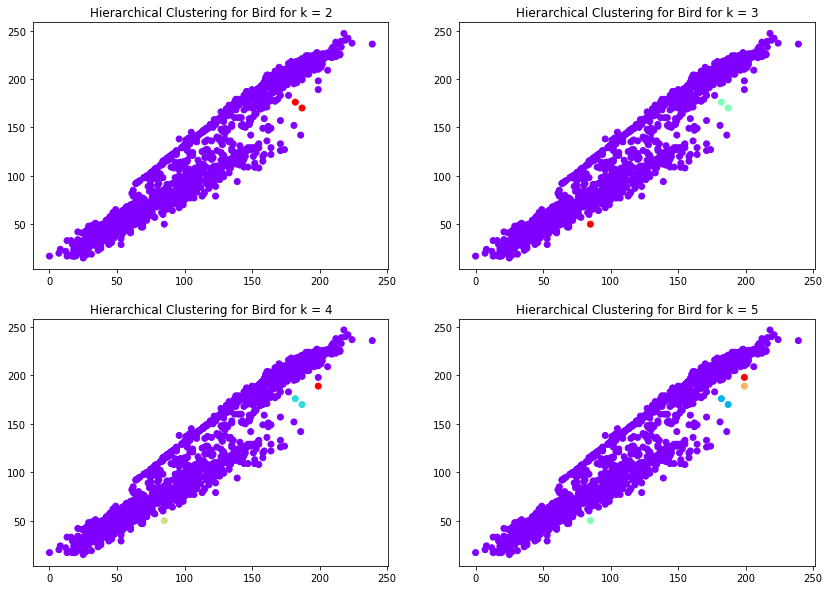

Runtime of Hierarchical clustering on Bird: 3.2674520015716553
For k = 2, the average Silhouette Coefficient : -0.06712354719638824, CH Index : 0.315822720260318
For k = 3, the average Silhouette Coefficient : -0.17536108195781708, CH Index : 2.809373228848523
For k = 4, the average Silhouette Coefficient : -0.25221046805381775, CH Index : 1.9749798437589903
For k = 5, the average Silhouette Coefficient : -0.4280107021331787, CH Index : 1.565061966745013


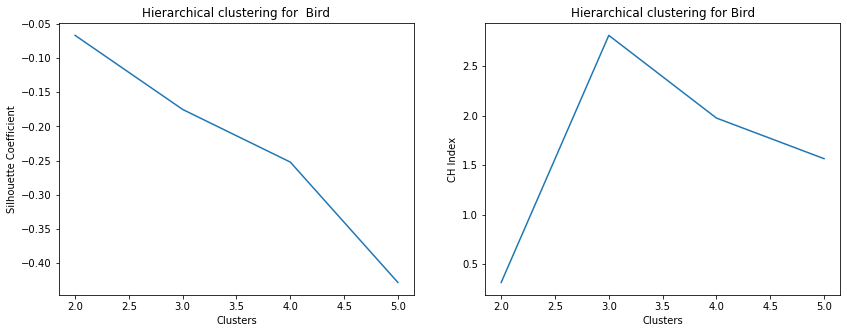

In [24]:
#Hierarchical clustering for Bird
k = [2, 3, 4,5]
scBird = []
chBird = []
a = 2
b = 2
c = 1

df = pd.DataFrame(pixelBird).sample(n=5000, random_state=1)

start = time.time()
fig = plt.figure(figsize=(14,10))
for num in k:
    cluster = AgglomerativeClustering(n_clusters=num, affinity='euclidean', linkage='single')
    cluster.fit_predict(df)
    labels = cluster.labels_
    
    scBird.append(silhouette_score(df, labels, metric = 'euclidean'))
    chBird.append(calinski_harabasz_score(df, labels))

    plt.subplot(a, b, c)
    plt.title('Hierarchical Clustering for Bird for k = {}'.format(num))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1],c=labels , cmap='rainbow')
    c += 1

plt.show()
print(f"Runtime of Hierarchical clustering on Bird: {time.time() - start}")

for i in range(4):
    print("For k = {}, the average Silhouette Coefficient : {}, CH Index : {}".format(i+2,scBird[i],chBird[i]))

fig = plt.figure(figsize = (14, 5)) 
fig.add_subplot(121)
plt.plot(np.arange(2,6), scBird)
plt.title('Hierarchical clustering for  Bird')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')

fig.add_subplot(122)
plt.plot(np.arange(2,6), chBird)
plt.title('Hierarchical clustering for Bird')
plt.xlabel('Clusters')
plt.ylabel('CH Index')

plt.show()

**Return to the PCA and t-SNE plots to display your clustering solutions in those scatter plots.**

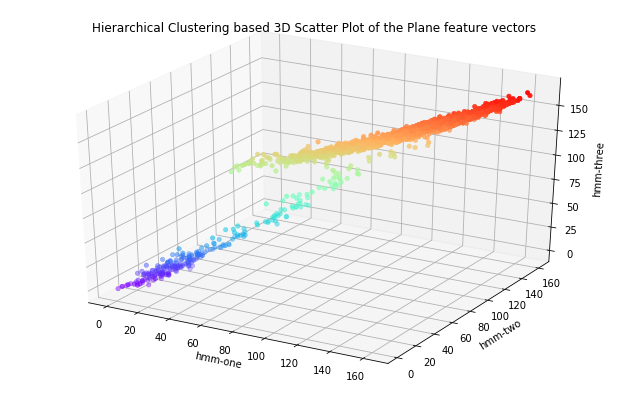

In [25]:
##Plotting clustering solutions for Plane
df = pd.DataFrame(pixelPlane).sample(n=5000, random_state=1)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(df)
labels = cluster.labels_

filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
filtered_label2 = df[labels == 2]
filtered_label = filtered_label0.append([filtered_label1, filtered_label2])

hmm_one = filtered_label.iloc[:,0]
hmm_two = filtered_label.iloc[:,1]
hmm_three = filtered_label.iloc[:,2]

fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
ax.scatter3D(hmm_one, hmm_two, hmm_three, c = hmm_three, cmap='rainbow', linewidth=0.5)
plt.title("Hierarchical Clustering based 3D Scatter Plot of the Plane feature vectors")
ax.set_xlabel('hmm-one')
ax.set_ylabel('hmm-two')
ax.set_zlabel('hmm-three')
plt.show()

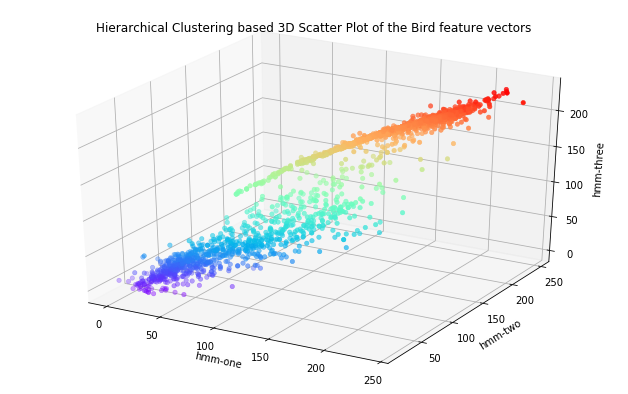

In [26]:
##Plotting clustering solutions for Bird
df = pd.DataFrame(pixelBird).sample(n=5000, random_state=1)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(df)
labels = cluster.labels_

filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
filtered_label2 = df[labels == 2]
filtered_label = filtered_label0.append([filtered_label1, filtered_label2])

hmm_one = filtered_label.iloc[:,0]
hmm_two = filtered_label.iloc[:,1]
hmm_three = filtered_label.iloc[:,2]

fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
ax.scatter3D(hmm_one, hmm_two, hmm_three, c = hmm_three, cmap='rainbow', linewidth=0.5)
plt.title("Hierarchical Clustering based 3D Scatter Plot of the Bird feature vectors")
ax.set_xlabel('hmm-one')
ax.set_ylabel('hmm-two')
ax.set_zlabel('hmm-three')
plt.show()